In [1]:
import numpy as np
from skimage import io,color,transform,morphology,measure,filters
from scipy.cluster.vq import vq, kmeans2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

255 0


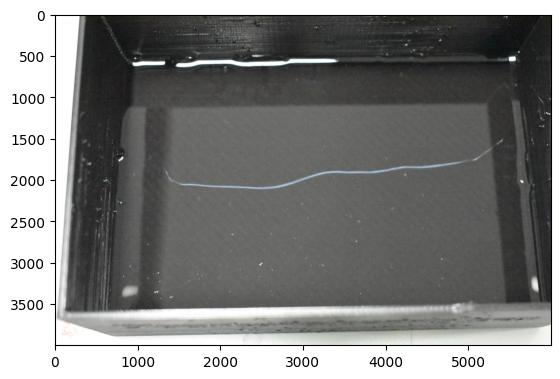

In [17]:
image = io.imread('./trial2/Rb/DSC_0281.JPG')
plt.imshow(image)
channel = image[:,:,2]
print(np.max(channel),np.min(channel))

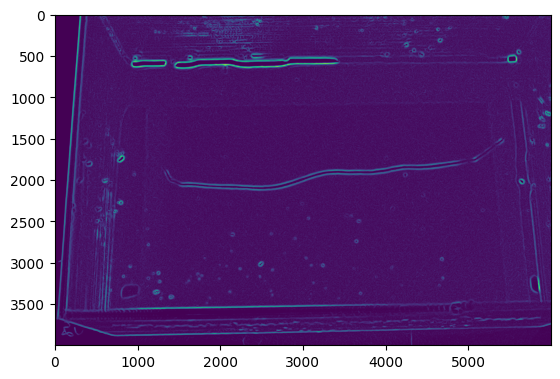

In [19]:
#filters.meijering,filters.sato,filters.frangi
filament = filters.meijering(channel)
plt.imshow(filament)

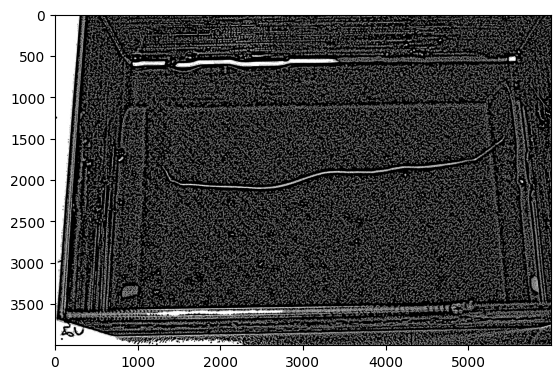

In [31]:
skin = filament!=0 #filters.threshold_isodata(filament)
plt.imshow(skin,cmap='binary')

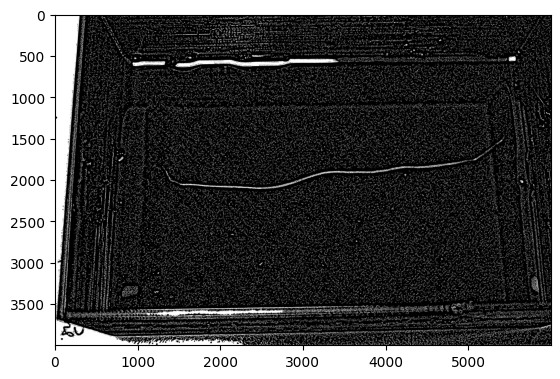

In [43]:
plt.imshow(morphology.binary_closing(skin,morphology.star(1)),cmap='binary')

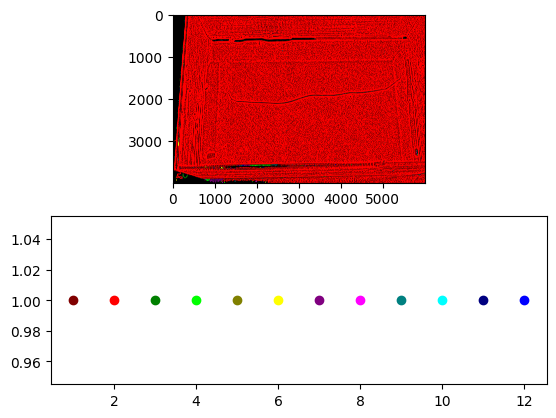

In [34]:
islands =  measure.label(skin)
colors = [[.5,0,0],[1,0,0],[0,.5,0],[0,1,0],[.5,.5,0],[1,1,0],[.5,0,.5],[1,0,1],[0,0.5,0.5],[0,1,1],[0,0,0.5],[0,0,1]]
fig,axs=plt.subplots(2,1)
axs[0].imshow(color.label2rgb(islands,colors=colors))
i=1
for c in colors:
    axs[1].plot(i,1,'o',color=c)
    i+=1